In [1]:
from NeutrinoMassFuncs import *
from PlottingFuncs import *

import matplotlib.pyplot as plt
import matplotlib
### matplotlib configuration
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# Plot the effective Majorana mass as a function of the lightest neutrino mass

by Yanina Biondi <ybiondi@physik.uzh.ch>

## Relevant papers

 - https://arxiv.org/pdf/1301.6997.pdf Engel, Mustonen RRPA
 - https://arxiv.org/pdf/1411.5506.pdf Stoica
 - https://arxiv.org/pdf/1209.5722.pdf Kotila, Iachello
 - https://arxiv.org/pdf/1008.5260.pdf Rodriguez, Martinez-Pinedo
 
 - Oscillation values from V41 nu-Fit http://www.nu-fit.org/sites/default/files/v41.tbl-parameters.pdf no SK atmospheric data
 


In [2]:
# Initialize Oscillation parameters for NO and IO with 3s
# it takes a while, to be optimized
gn = OscParametersNO.findEffectiveMajoranaMassRegion()
gn3s = OscParametersNOL.findEffectiveMajoranaMassRegion()
gn3sH = OscParametersNOH.findEffectiveMajoranaMassRegion()
giIO = OscParametersIO.findEffectiveMajoranaMassRegion()
giIO3s = OscParametersIOL.findEffectiveMajoranaMassRegion()
giIO3sH = OscParametersIOH.findEffectiveMajoranaMassRegion()

# DARWIN Limits
DARWINLimit = 2.8e27 # y
phaseSpaceFactor = 14.58e-15 # y^{-1}
NuclearMatrixElement_low = 1.89
NuclearMatrixElement_high = 4.73
electronMass = 511e3 ## in eV

# Calculate the effective Majorana mass from the experiment
mbb_DARWIN = (electronMass*1/np.sqrt(phaseSpaceFactor*DARWINLimit))*np.array([1/NuclearMatrixElement_low, 1/NuclearMatrixElement_high])

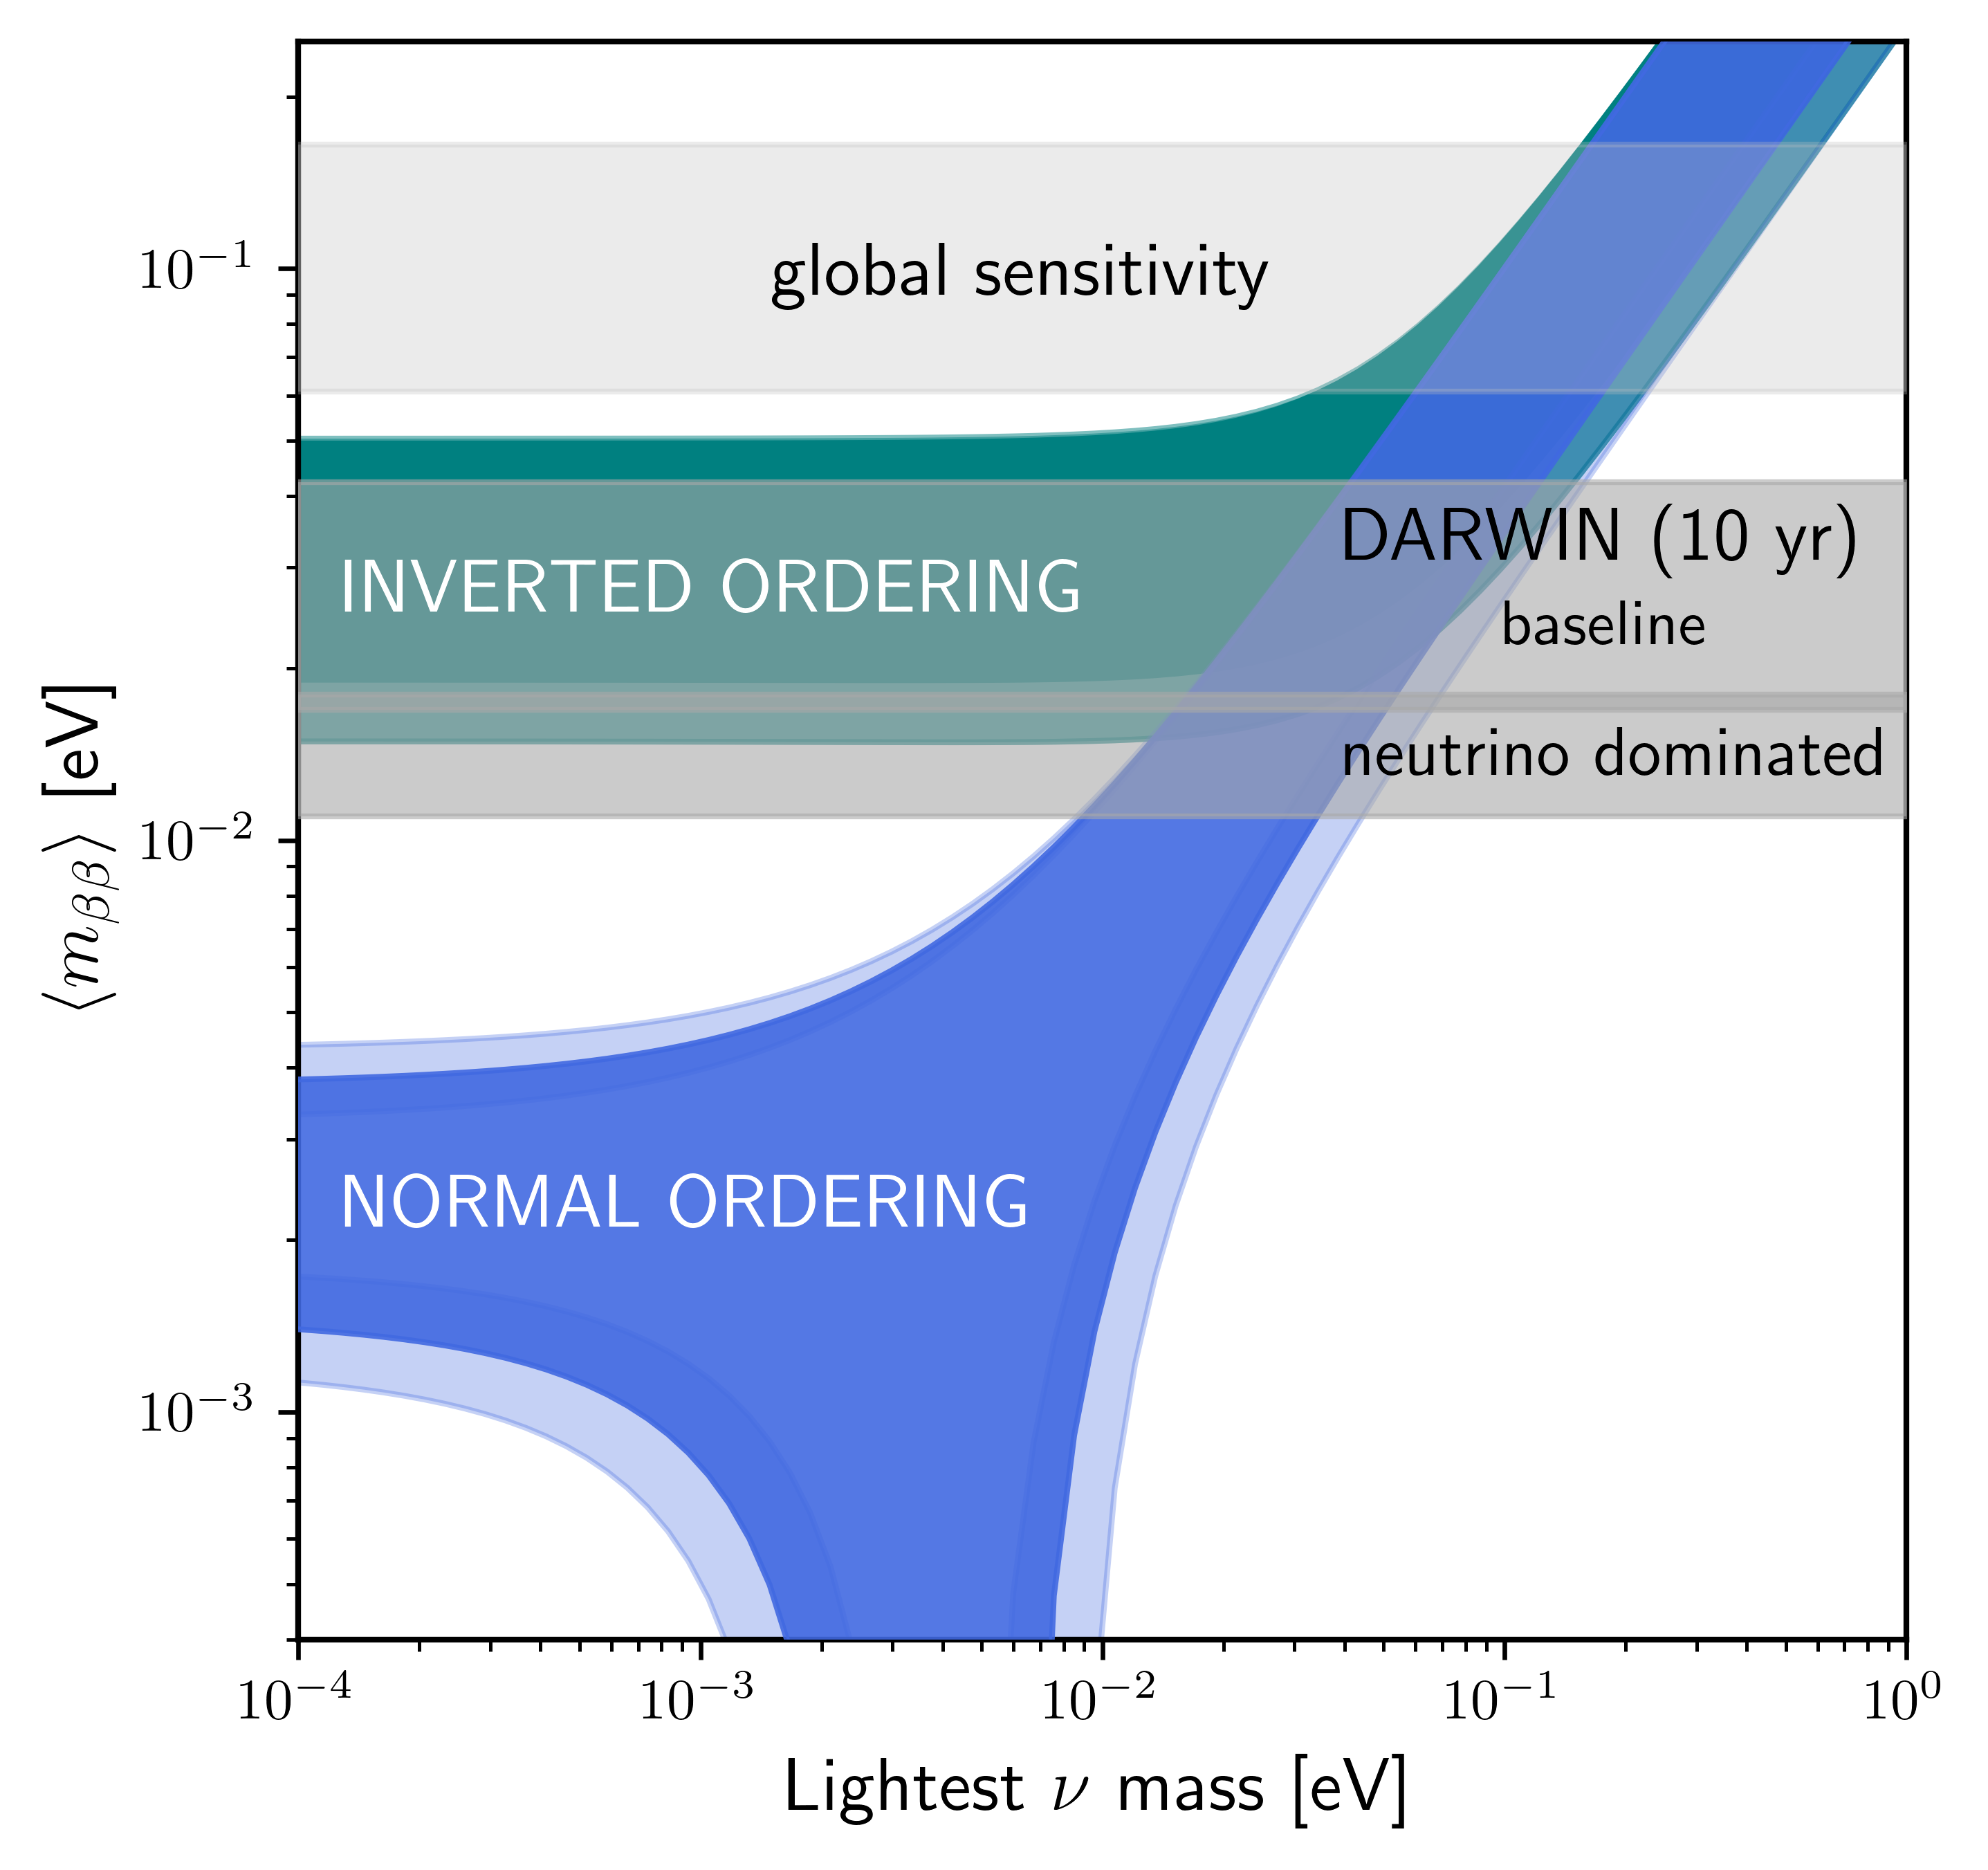

In [3]:

fig, ax, lightest_neutrino, effective_masses = plot_lobster(gn, gn3s, gn3sH, giIO, giIO3s, giIO3sH)

ax.text(0.4e-1, 13e-3, 'neutrino dominated',color='black',fontsize=12,rotation=0,zorder=6)#,bbox= dict(boxstyle="round", ec="white",fc="white", pad=0.1, alpha= 0.7))
ax.text(1e-1, 2.2e-2, 'baseline',color='black',fontsize=11,rotation=0,zorder=6)#,bbox= dict(boxstyle="round", ec="white",fc="white", pad=0.1, alpha= 0.7))
ax.text(0.4e-1, 3.1e-2, 'DARWIN (10 yr)',color='black',fontsize=13,rotation=0,zorder=6)#,bbox= dict(boxstyle="round", ec="white",fc="white", pad=0.1, alpha= 0.7))
ax.fill_between(lightest_neutrino,mbb_DARWIN[1]*effective_masses,mbb_DARWIN[0]*effective_masses, color="darkgray", alpha=0.6, zorder=5)
ax.fill_between(lightest_neutrino,11e-3*effective_masses,18e-3*effective_masses, color="darkgray", alpha=0.6, zorder=5)

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$  \left \langle m_{\beta \beta} \right \rangle $ [eV]')
plt.xlabel(r'Lightest $\nu$ mass [eV]')
#plt.legend(fontsize=24, loc='upper left')
plt.xlim(1e-4, 1)
plt.ylim(4e-4, 2.5e-1)
plt.savefig('effectiveMajoranaMassVsLightestNeutrinoMass.pdf', dpi=300)
plt.show()